In [2]:
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt



In [9]:
###this is to test current system 

def test_show(image,imname="Test Image"):
   
    plt.imshow(image)
    plt.title(imname)
    plt.show()


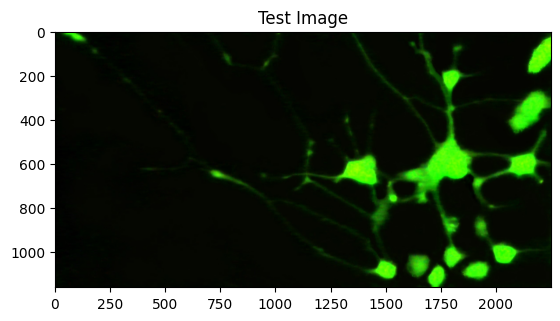

In [10]:
image=cv2.imread("002.jpg")
test_show(image)

In [14]:
## this step uses model to create a predicton and also img processed to create a processed image

# this image process make brightnes 3.4 and contrast 0.4 to improve readibility of image 

def imgProces( img : np.ndarray) -> np.ndarray:
    alpha = 0.4  # Contrast control (1.0 means no change)
    beta = 2.4    # Brightness control (0 means no change)
    adjusted_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return adjusted_image

def predictionPrepartaion(image):
    image = cv2.resize(image, (256, 256))  # Giriş boyutunu (256, 256) olarak yeniden boyutlandırma
    image = np.expand_dims(image, axis=-1)  # Tek bir kanal ekleyerek (256, 256) boyutunu (256, 256, 1) olarak genişletiyoruz
    return image
  
## image is the input from first cell
    
image = predictionPrepartaion(image)
proccesed_image = imgProces(image)


threshold_value = 20

# Binarize the image using the threshold

def dice_coef(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (2.0 * intersection + 1e-5) / (union + 1e-5)

def iou_score(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    return (intersection + 1e-5) / (union + 1e-5)
# Modeli yükleme sırasında özel metrik fonksiyonları tanımlama
with tf.keras.utils.custom_object_scope({'dice_coef': dice_coef, 'iou_score': iou_score}):
    model_path = 'best_model.hdf5'
    model = tf.keras.models.load_model(model_path)

prediction_result = model.predict(np.expand_dims(image, axis=0))
prediction_result = (prediction_result * 255).astype(np.uint8)

processed_prediction_result = model.predict(np.expand_dims(proccesed_image, axis=0))
processed_prediction_result = (prediction_result * 255).astype(np.uint8)



test_show(image,"input image")
test_show(proccesed_image,"processed image")
test_show(prediction_result[0],"prediction")
test_show(processed_prediction_result[0],"processed prediction")



: 